In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Cleaning the Data

In [234]:
df = pd.read_csv('/content/data_new.csv')
data_df = df.reset_index()
total_data = len(data_df)
data_df.info()
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48784 entries, 0 to 48783
Columns: 161 entries, index to gagne_sum_t
dtypes: float64(22), int64(138), object(1)
memory usage: 59.9+ MB


,index,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,...,0,0,0,0,0,0,0,0,0,0
1,1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,...,0,1,0,0,1,0,0,1,4,3
2,2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,...,0,0,0,0,0,0,0,0,1,1


In [235]:
#Cleaning demographic variables
def gender_cleaning(obs):
  if obs == 1:
    return "Female"
  elif obs == 0:
    return "Male"

def race_cleaning(obs):
  if obs == "black":
    return 0
  elif obs == "white":
    return 1

age_data = data_df[['dem_age_band_18-24_tm1','dem_age_band_25-34_tm1','dem_age_band_35-44_tm1','dem_age_band_45-54_tm1','dem_age_band_55-64_tm1','dem_age_band_65-74_tm1','dem_age_band_75+_tm1']]
age_counts = age_data.sum()
melted_age = pd.melt(age_data)
melted_age = melted_age[melted_age['value'] == 1]

data_df['dem_gender'] = data_df['dem_female'].apply(lambda x: gender_cleaning(x))
data_df['dem_white'] = data_df['race'].apply(lambda x: race_cleaning(x))

In [101]:
# DEMOGRAPHIC DATA
def print_plots():
  # Gender chart
  sns.countplot(x='dem_gender', data=data_df, palette='Paired')
  plt.title("Count by Gender")
  plt.xlabel("Gender")
  plt.ylabel("Count")
  plt.show()

  gender_count = pd.crosstab(index = data_df['dem_gender'], columns = 'Count')
  gender_count.columns = ['Count']
  gender_count['Percentage'] = gender_count.sum(axis=1)
  gender_count['Percentage'] = gender_count['Percentage'].div(total_data) * 100
  display(gender_count)

  # Race chart
  sns.countplot(x='race', data=data_df, palette='Set2')
  plt.title("Count by Race")
  plt.xlabel("Race")
  plt.ylabel("Count")
  plt.show()

  race_count = pd.crosstab(index = data_df['race'], columns = 'Count')
  race_count.columns = ['Count']
  race_count['Percentage'] = race_count.sum(axis=1)
  race_count['Percentage'] = race_count['Percentage'].div(total_data) * 100
  display(race_count)

  # Age band chart
  plt.figure(figsize=(15, 6))
  sns.barplot(x=age_counts.index, y=age_counts.values)
  plt.xticks(range(len(age_counts)), [label.split('_')[3] for label in age_counts.index])
  plt.title('Counts for Each Age Band')
  plt.xlabel('Age Band')
  plt.ylabel('Count')
  plt.show()

  age_count = pd.crosstab(index=melted_age['variable'], columns=melted_age['value'])
  age_count.index = ['18-24', '25-34', '35-44', '45-54', '55-64','65-74','75+']
  age_count.columns = ['Count']
  age_count['Percentage'] = age_count.sum(axis=1)
  total_age = age_counts.sum()
  age_count['Percentage'] = age_count['Percentage'].div(total_age) * 100
  display(age_count)

In [109]:
from scipy.stats import percentileofscore

def create_table(df, race, total_n):
    df = df.copy()
    table_list = []

    n = len(df) * 1.0
    table_list.append(('n (patient-years)', '{:,}'.format(n)))

    # Demographics

    table_list.append(('Demographics', '---'))
    table_list.append(('Female', '{:.2f}'.format(df['dem_female'].sum() / n)))
    table_list.append(('Age 18-24','{:.2f}'.format(df['dem_age_band_18-24_tm1'].sum() / n)))
    table_list.append(('Age 25-34', '{:.2f}'.format(df['dem_age_band_25-34_tm1'].sum() / n)))
    table_list.append(('Age 35-44', '{:.2f}'.format(df['dem_age_band_35-44_tm1'].sum() / n)))
    table_list.append(('Age 45-54', '{:.2f}'.format(df['dem_age_band_45-54_tm1'].sum() / n)))
    table_list.append(('Age 55-64', '{:.2f}'.format(df['dem_age_band_55-64_tm1'].sum() / n)))
    table_list.append(('Age 65-74', '{:.2f}'.format(df['dem_age_band_65-74_tm1'].sum() / n)))
    table_list.append(('Age 75+', '{:.2f}'.format(df['dem_age_band_75+_tm1'].sum() / n)))

    # Care management program

    table_list.append(('Care management program', '---'))
    df['risk_score_t_percentile'] = df['risk_score_t'].apply(lambda x: percentileofscore(df['risk_score_t'], x))
    table_list.append(('Algorithm score (mean percentile)', '{:.0f}'.format(df['risk_score_t_percentile'].mean())))
    # table_list.append(('Race composition of program (%)', '{:.1f}'.format(n / total_n * 100)))

    # Care utilization

    table_list.append(('Care utilization', '---'))
    table_list.append(('Actual cost (mean)', '${:,.0f}'.format(df['cost_t'].mean())))

    # Mean biomarker values

    table_list.append(('Mean biomarkers', '---'))
    table_list.append(('HbA1c', '{:.1f}'.format(df['ghba1c_mean_t'].mean())))
    table_list.append(('Systolic BP', '{:.1f}'.format(df['bps_mean_t'].mean())))
    table_list.append(('Creatinine', '{:.1f}'.format(df['cre_mean_t'].mean())))
    table_list.append(('Hematocrit', '{:.1f}'.format(df['hct_mean_t'].mean())))
    table_list.append(('LDL', '{:.1f}'.format(df['ldl_mean_t'].mean())))

    # Active chronic illnesses (comorbidities)

    table_list.append(('Active chronic illnesses (mean comorbidities)', '---'))
    table_list.append(('Total number of active illnesses', '{:.2f}'.format(df['gagne_sum_t'].mean())))
    table_list.append(('Hypertension',
        '{:.2f}'.format(df['hypertension_elixhauser_tm1'].mean())))
    table_list.append(('Diabetes, uncomplicated', '{:.2f}'.format(df['uncompdiabetes_elixhauser_tm1'].mean())))
    table_list.append(('Arrythmia',
        '{:.2f}'.format(df['arrhythmia_elixhauser_tm1'].mean())))
    table_list.append(('Hypothyroid', '{:.2f}'.format(df['hypothyroid_elixhauser_tm1'].mean())))
    table_list.append(('Obesity', '{:.2f}'.format(df['obesity_elixhauser_tm1'].mean())))
    table_list.append(('Pulmonary disease', '{:.2f}'.format(df['pulmonarydz_romano_tm1'].mean())))
    table_list.append(('Cancer', '{:.2f}'.format(df['tumor_romano_tm1'].mean())))
    table_list.append(('Depression', '{:.2f}'.format(df['depression_elixhauser_tm1'].mean())))
    table_list.append(('Anemia', '{:.2f}'.format(df['anemia_elixhauser_tm1'].mean())))
    table_list.append(('Arthritis', '{:.2f}'.format(df['arthritis_elixhauser_tm1'].mean())))
    table_list.append(('Renal failure', '{:.2f}'.format(df['renal_elixhauser_tm1'].mean())))
    table_list.append(('Electrolyte disorder', '{:.2f}'.format(df['electrolytes_elixhauser_tm1'].mean())))
    table_list.append(('Heart failure', '{:.2f}'.format(df['chf_romano_tm1'].mean())))
    table_list.append(('Psychosis', '{:.2f}'.format(df['psychosis_elixhauser_tm1'].mean())))
    table_list.append(('Valvular disease', '{:.2f}'.format(df['valvulardz_elixhauser_tm1'].mean())))
    table_list.append(('Stroke', '{:.2f}'.format(df['hemiplegia_romano_tm1'].mean())))
    table_list.append(('Peripheral vascular disease', '{:.2f}'.format(df['pvd_elixhauser_tm1'].mean())))
    table_list.append(('Diabetes, complicated', '{:.2f}'.format(df['compdiabetes_elixhauser_tm1'].mean())))
    table_list.append(('Heart attack', '{:.2f}'.format(df['myocardialinfarct_romano_tm1'].mean())))
    table_list.append(('Liver disease', '{:.2f}'.format(df['liver_elixhauser_tm1'].mean())))

    table1_df = pd.DataFrame(table_list, columns=['Descriptive stats', race])

    return table1_df

def build_table():

    total_n = total_data * 1.0

    # Split by white, Black patients
    white_df = data_df[data_df['race'] == 'white']
    black_df = data_df[data_df['race'] == 'black']

    white_table = create_table(white_df, 'White', total_n)
    black_table = create_table(black_df, 'Black', total_n)

    # Merge white table and Black table for final table
    table = white_table.merge(black_table)

    display(table)

In [108]:
build_table()

,Descriptive stats,White,Black
0,n (patient-years),"43,202.0","5,582.0"
1,Demographics,---,---
2,Female,0.63,0.66
3,Age 18-24,0.04,0.04
4,Age 25-34,0.11,0.11
5,Age 35-44,0.19,0.20
6,Age 45-54,0.24,0.25
7,Age 55-64,0.20,0.18
8,Age 65-74,0.14,0.14
9,Age 75+,0.07,0.07


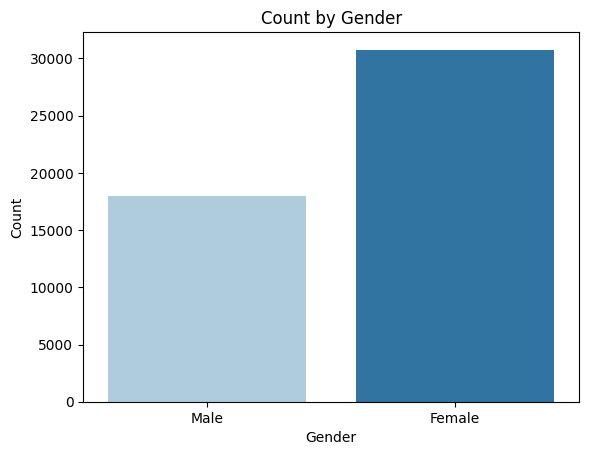

,Count,Percentage
dem_gender,,
Female,30763,63.05961
Male,18021,36.94039


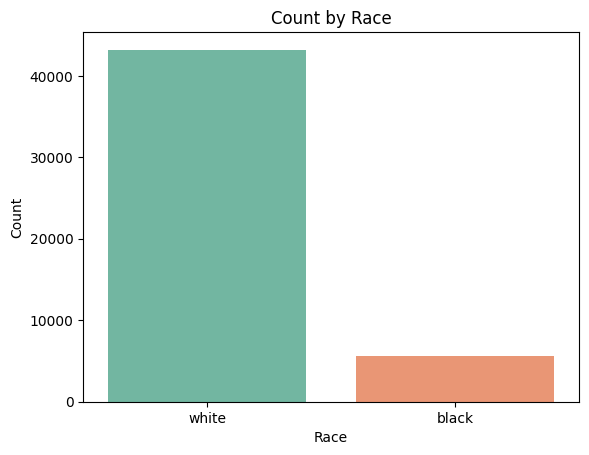

,Count,Percentage
race,,
black,5582,11.442276
white,43202,88.557724


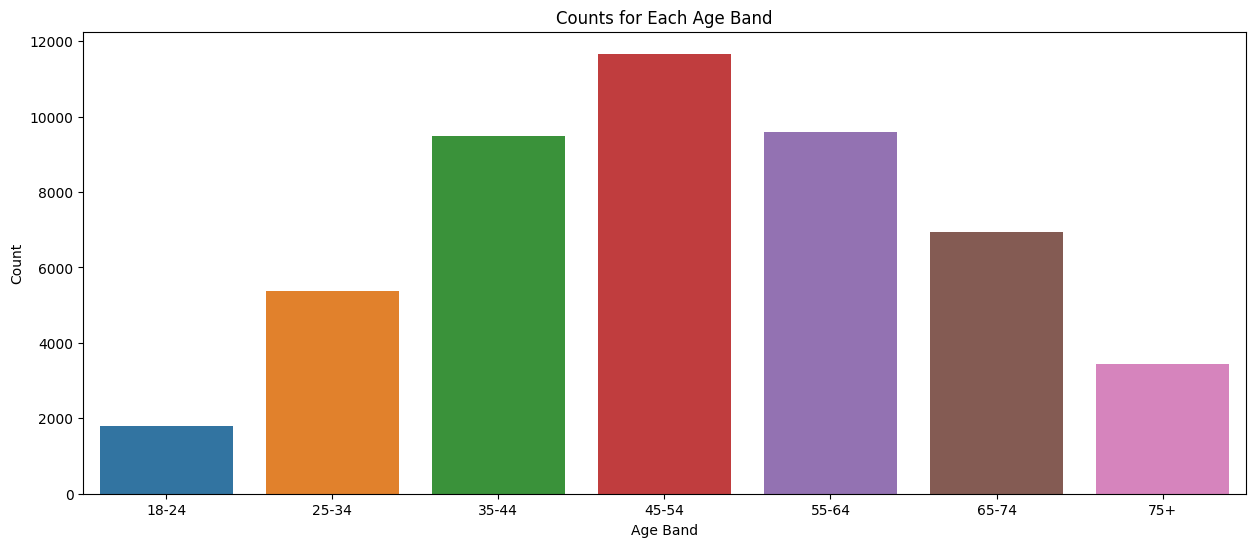

,Count,Percentage
18-24,1799,3.725872
25-34,5380,11.142407
35-44,9481,19.635904
45-54,11665,24.159142
55-64,9590,19.861652
65-74,6940,14.373291
75+,3429,7.101731


In [105]:
print_plots()

### Predictive Analytics

In [228]:
data = pd.read_csv("/content/data_new.csv")

In [229]:
# To find how much missing data is in each column:
# Count the missing values in each column
missing_values = data.isnull().sum()

# Sum the total number of missing values in the entire DataFrame
total_missing_values = missing_values.sum()

# Print the results
print("Number of missing values in each column:")
print(missing_values)
print("\nTotal number of missing values in the DataFrame:", total_missing_values)

Number of missing values in each column:
risk_score_t               0
program_enrolled_t         0
cost_t                     0
cost_avoidable_t           0
bps_mean_t             10668
                       ...  
trig_max-low_tm1           0
trig_max-high_tm1          0
trig_max-normal_tm1        0
gagne_sum_tm1              0
gagne_sum_t                0
Length: 160, dtype: int64

Total number of missing values in the DataFrame: 127857


In [230]:
percentile_55 = data["risk_score_t"].quantile(0.55)
percentile_97 = data["risk_score_t"].quantile(0.97)

In [231]:
data["Referral"] = np.select([data["risk_score_t"] > percentile_97, (data["risk_score_t"] > percentile_55) & (data["risk_score_t"] <= percentile_97), data["risk_score_t"] <= percentile_55],
    [2, 1, 0],
    default=0)

### Creating Clusters

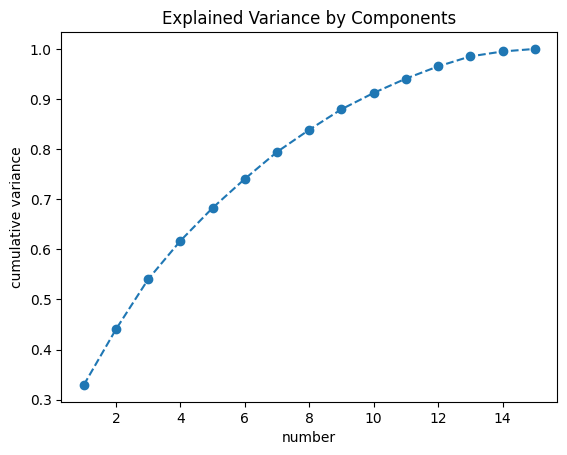

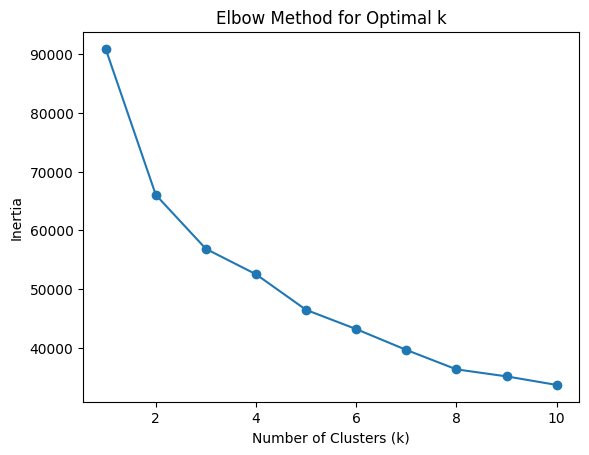

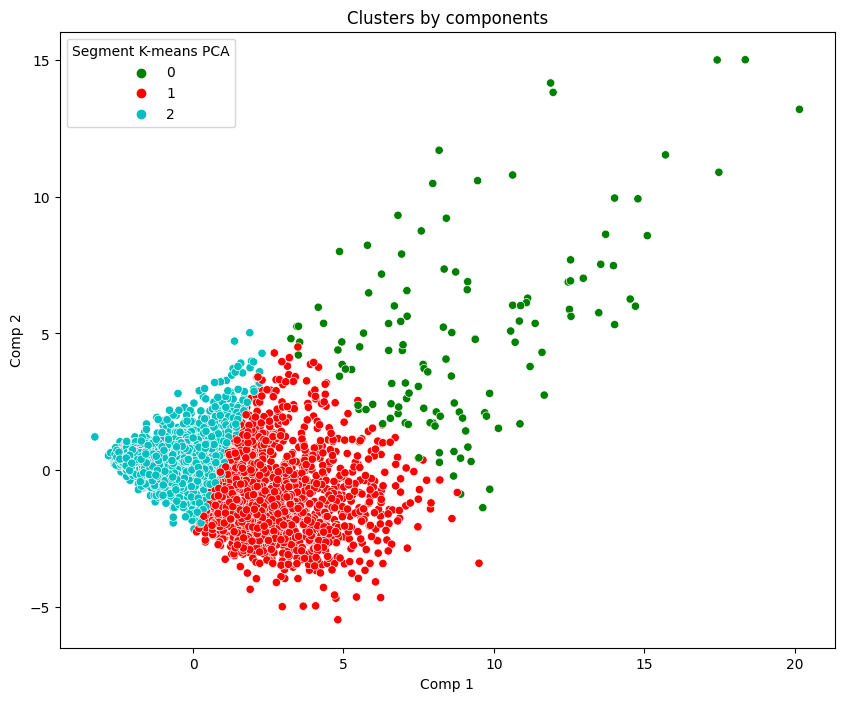

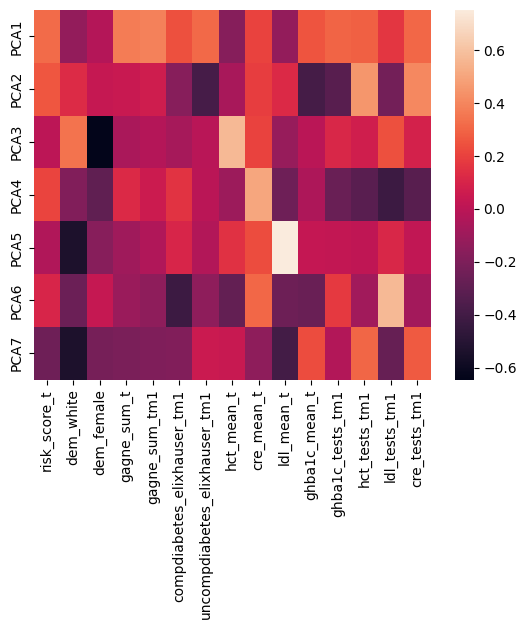

In [278]:
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# With demographics, some biomarkers, and no cost

selected_columns = ['risk_score_t', 'dem_white', 'dem_female', 'gagne_sum_t', 'gagne_sum_tm1','compdiabetes_elixhauser_tm1', 'uncompdiabetes_elixhauser_tm1','hct_mean_t', 'cre_mean_t', 'ldl_mean_t','ghba1c_mean_t', 'ghba1c_tests_tm1', 'hct_tests_tm1', 'ldl_tests_tm1', 'cre_tests_tm1']
copy_df = data_df.copy()
data_subset = copy_df[selected_columns].dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Fitting the data
pca = PCA()
pca.fit(scaled_data)

plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('number')
plt.ylabel('cumulative variance')
plt.show()


pca=PCA(n_components = 7)
pca.fit(scaled_data)
scores_pca = pca.transform(scaled_data)

# Optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scores_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow curve
optimal_k = 3

# # Apply kMeans clustering
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, init = 'k-means++', n_init='auto')
kmeans_pca.fit(scores_pca)

df_pca = pd.concat([data_subset.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca.columns.values[-7:] = ['Comp 1','Comp 2','Comp 3','Comp 4','Comp 5','Comp 6','Comp 7']
df_pca["Segment K-means PCA"] = kmeans_pca.labels_

x_axis = df_pca['Comp 1']
y_axis = df_pca['Comp 2']

plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_pca["Segment K-means PCA"], palette = ['g','r','c'])
plt.title('Clusters by components')
plt.show()

# Hue by Race
# plt.figure(figsize = (10,8))
# sns.scatterplot(x = x_axis, y = y_axis, hue = data_subset["dem_white"], palette = ['g','r','c','m'])
# plt.title('Clusters by components')
# plt.show()

# Represent the effect Features on PCA components
components=pd.DataFrame(pca.components_ ,index=['PCA1',"PCA2", "PCA3", "PCA4", "PCA5", "PCA6","PCA7"],columns=selected_columns)
sns.heatmap(components)
plt.show()

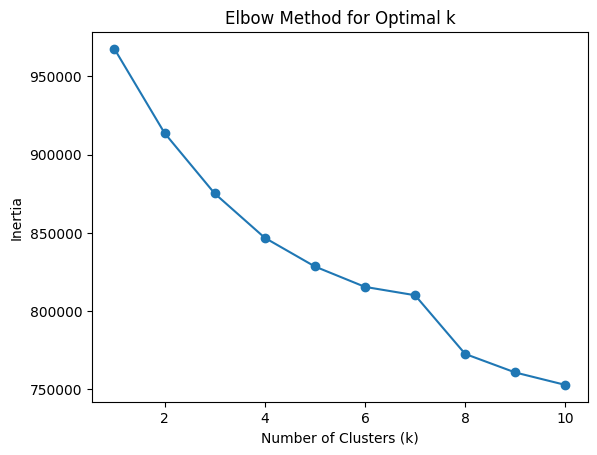

<ipython-input-279-63cf6bd51ac4>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = kmeans.fit_predict(scaled_data)


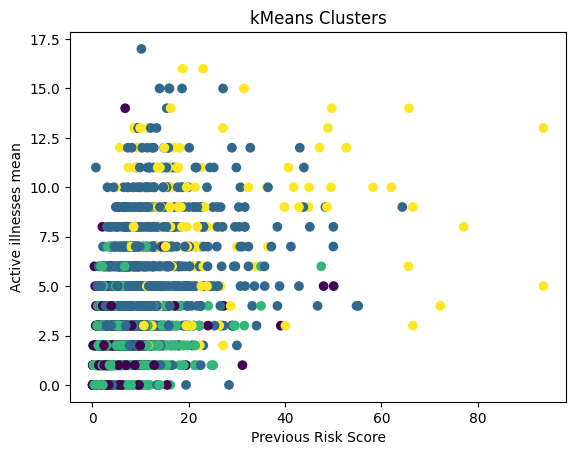

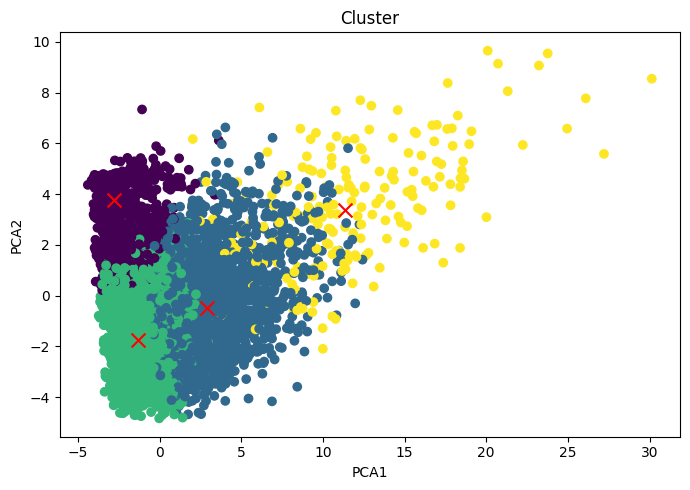

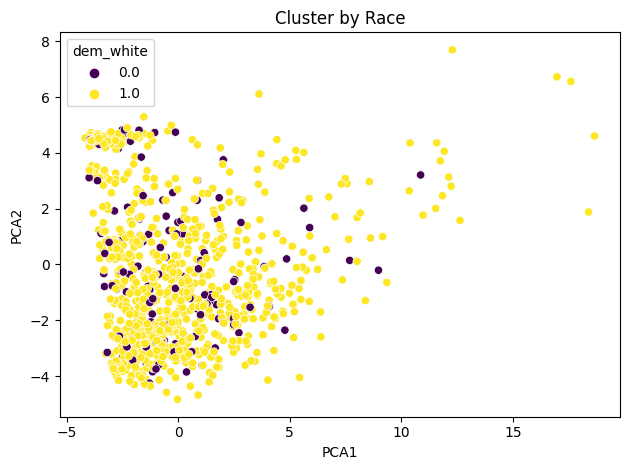

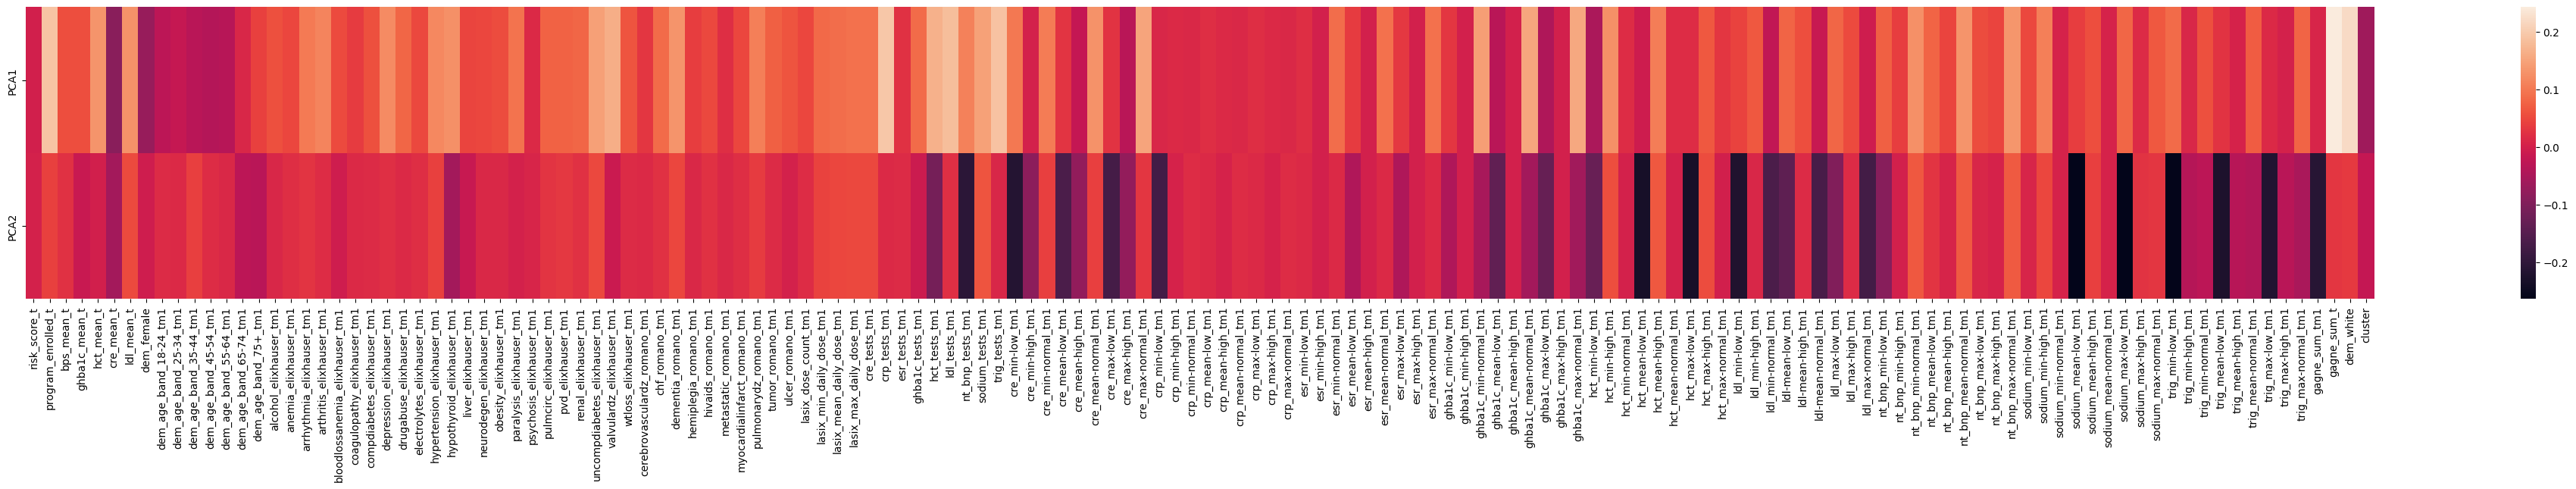

In [279]:
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

# With all variables besides cost-related

copy_df = data_df.copy()
drop_columns = copy_df.filter(like='cost').columns
copy_df = copy_df.drop(columns = drop_columns)
others = ['race', 'dem_gender']
copy_df = copy_df.drop(columns = others)
data_subset = copy_df.dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow curve
optimal_k = 4

# Apply kMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
data_subset['cluster'] = kmeans.fit_predict(scaled_data)

# Visualization
plt.scatter(data_subset['risk_score_t'], data_subset['gagne_sum_t'], c=data_subset['cluster'], cmap='viridis')
plt.title('kMeans Clusters')
plt.xlabel('Previous Risk Score')
plt.ylabel('Active illnesses mean')
plt.show()


pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(scaled_data),columns=['PCA1','PCA2'])

plt.figure(figsize=(7,5))

centers = pca.transform(kmeans.cluster_centers_)

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster')
plt.tight_layout()
plt.show()

# Cluster by Race
sns.scatterplot(x='PCA1', y='PCA2', hue=data_subset['dem_white'], data=reduced_X, palette='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster by Race')
plt.tight_layout()
plt.show()

col = []
for c in data_subset.columns:
  if c == "index":
    continue
  else:
    col.append(c)

# Represent the effect Features on PCA components
plt.figure(figsize=(50,5))
components=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=col)
sns.heatmap(components)
plt.show()

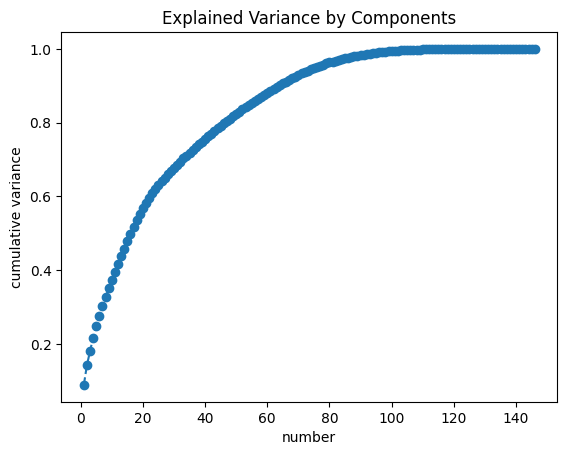

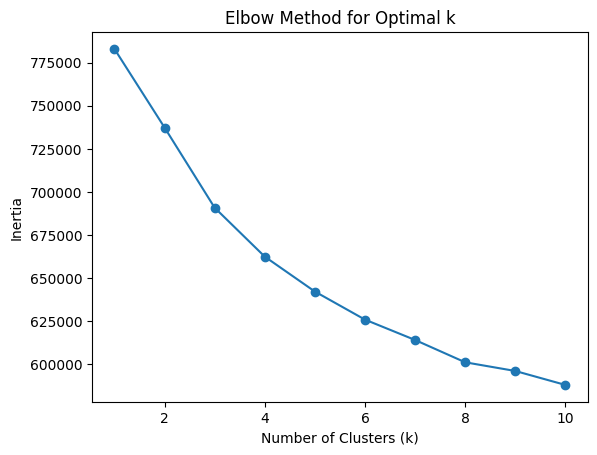

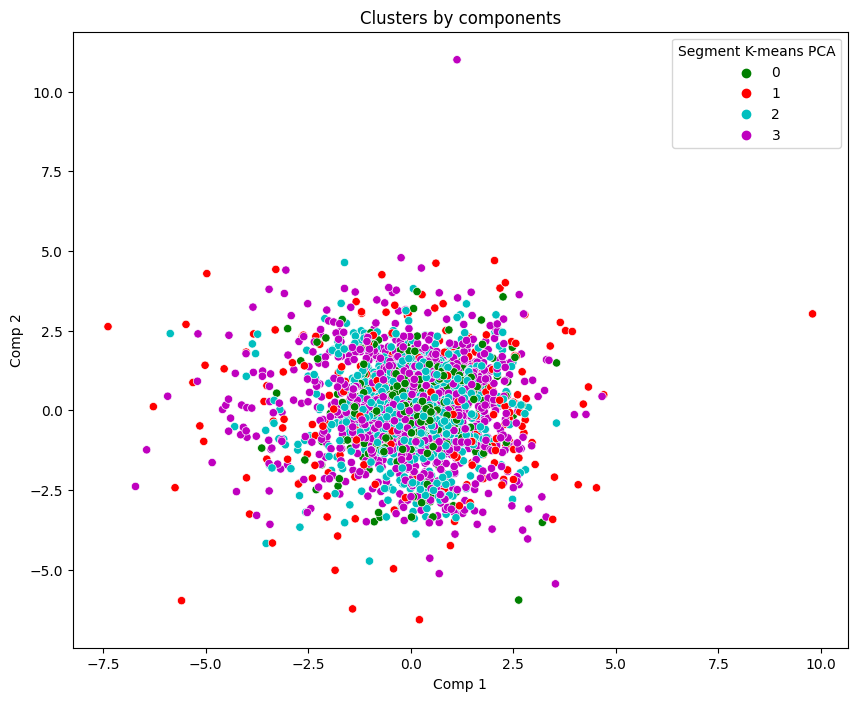

In [308]:
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

# With all variables besides cost-related

copy_df = data_df.copy()
drop_columns = copy_df.filter(like='cost').columns
copy_df = copy_df.drop(columns = drop_columns)
others = ['race', 'dem_gender']
copy_df = copy_df.drop(columns = others)
data_subset = copy_df.dropna()

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Fitting the data
pca = PCA()
pca.fit(scaled_data)

plt.plot(range(1,147), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('number')
plt.ylabel('cumulative variance')
plt.show()


pca=PCA(n_components = 48)
pca.fit(scaled_data)
scores_pca = pca.transform(scaled_data)

# Optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scores_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow curve
optimal_k = 4

# # Apply kMeans clustering
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, init = 'k-means++', n_init='auto')
# data_subset['cluster'] = kmeans.fit_predict(scaled_data)
kmeans_pca.fit(scores_pca)


df_pca = pd.concat([data_subset.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
for i in range(147,0,-1):
  col_name = "Comp " + str(i)
  df_pca.columns.values[-i] = col_name

df_pca["Segment K-means PCA"] = kmeans_pca.labels_

x_axis = df_pca['Comp 1']
y_axis = df_pca['Comp 2']

plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_pca["Segment K-means PCA"], palette = ['g','r','c', 'm'])
plt.title('Clusters by components')
plt.show()


#stop

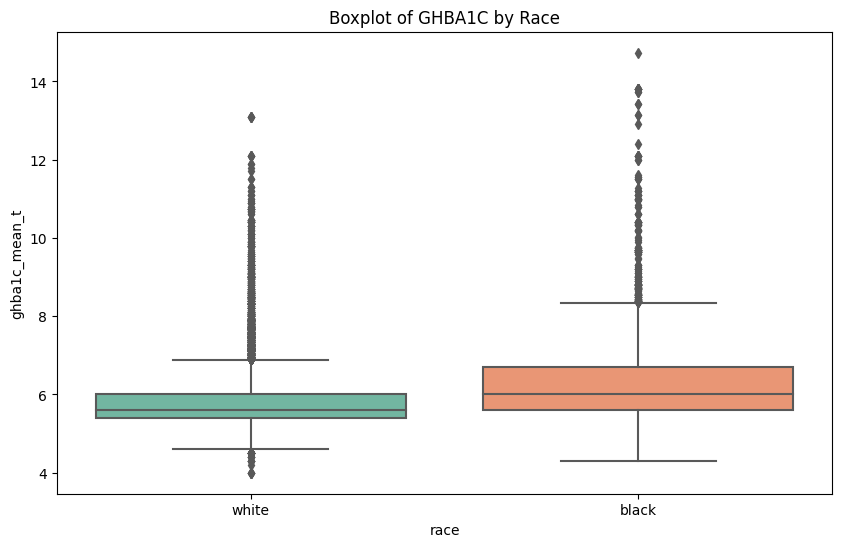

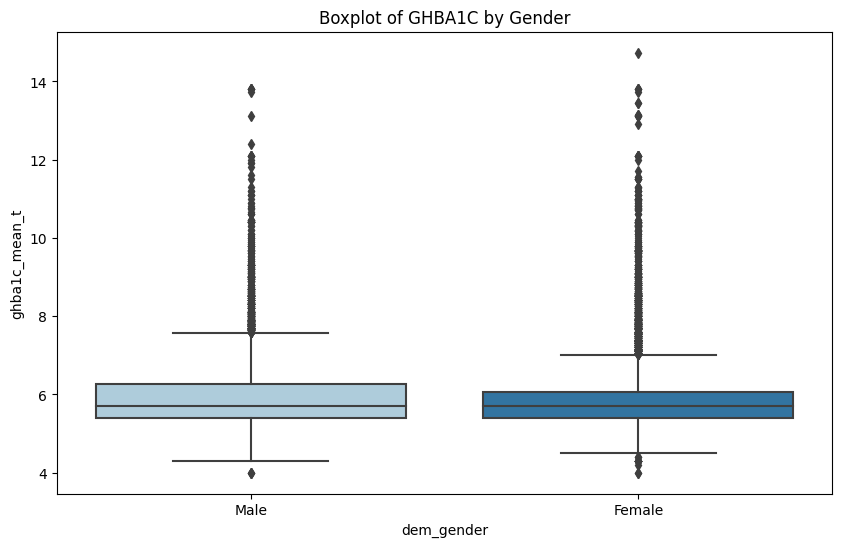

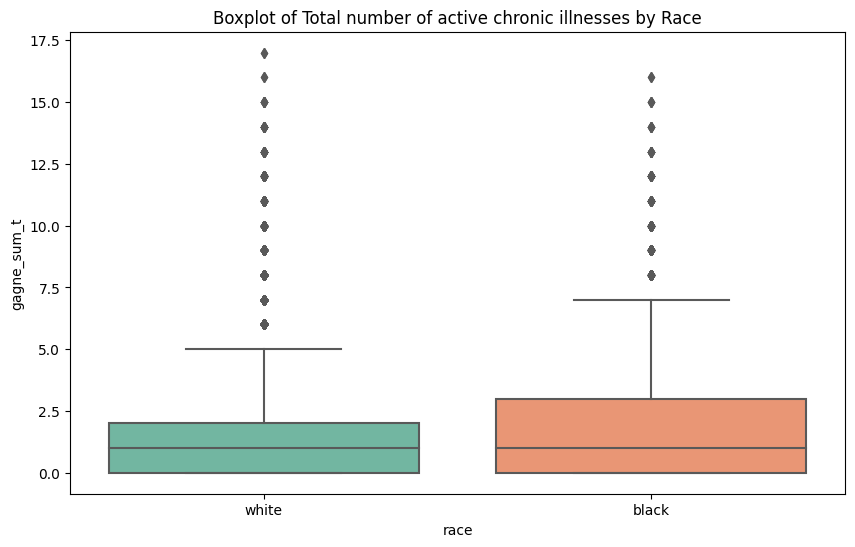

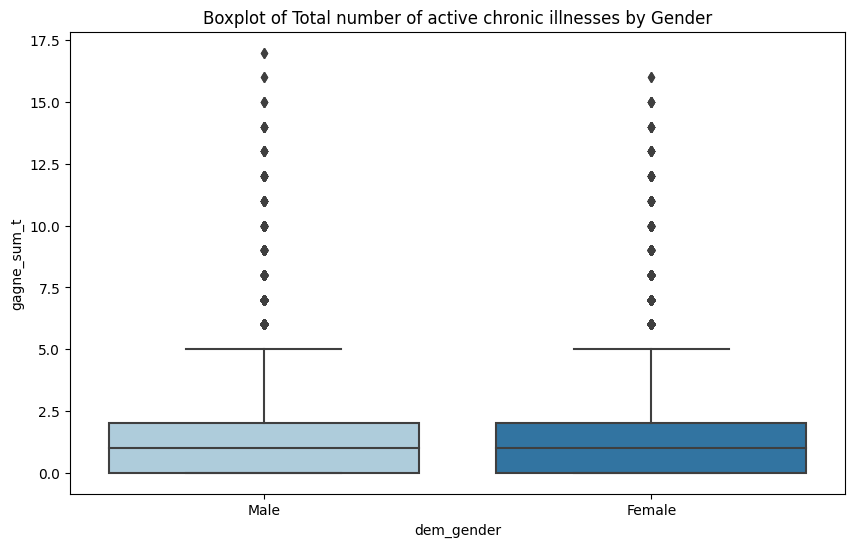

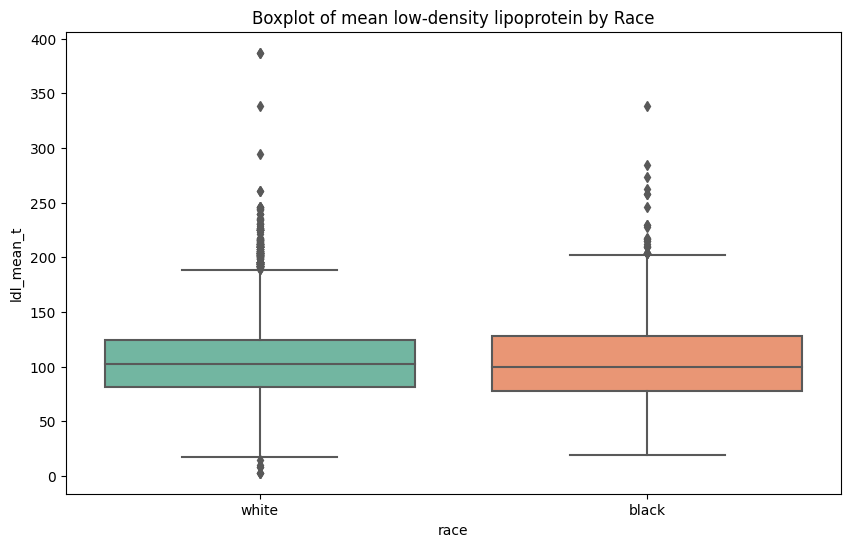

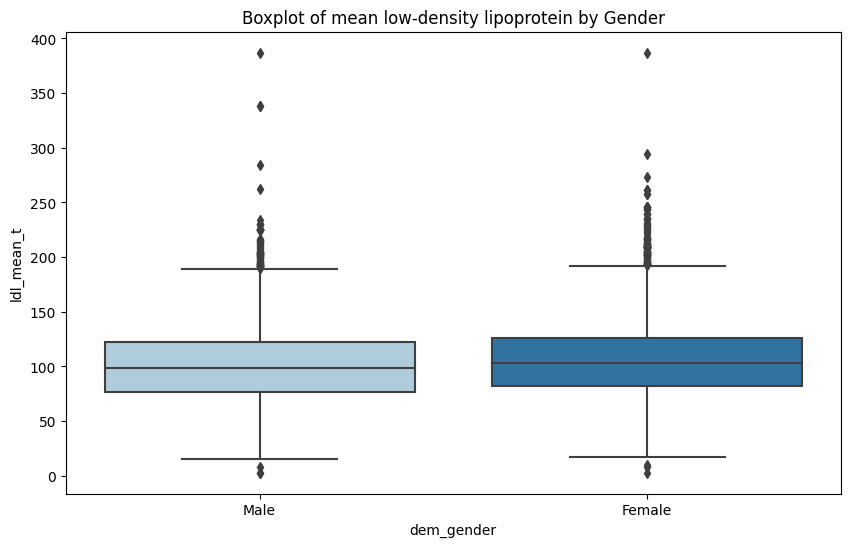

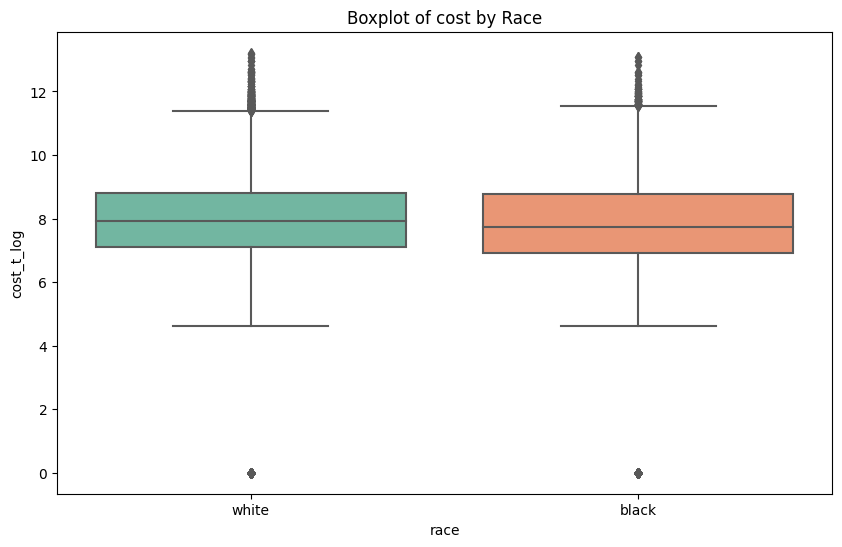

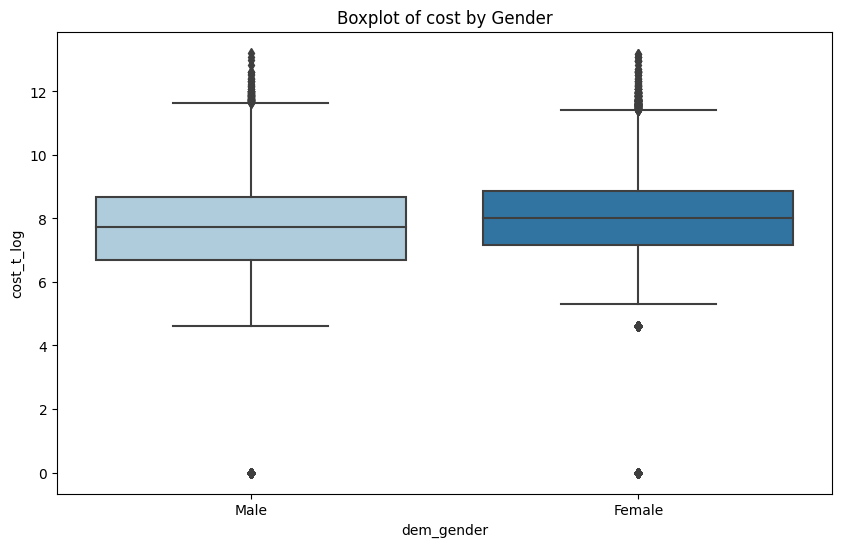

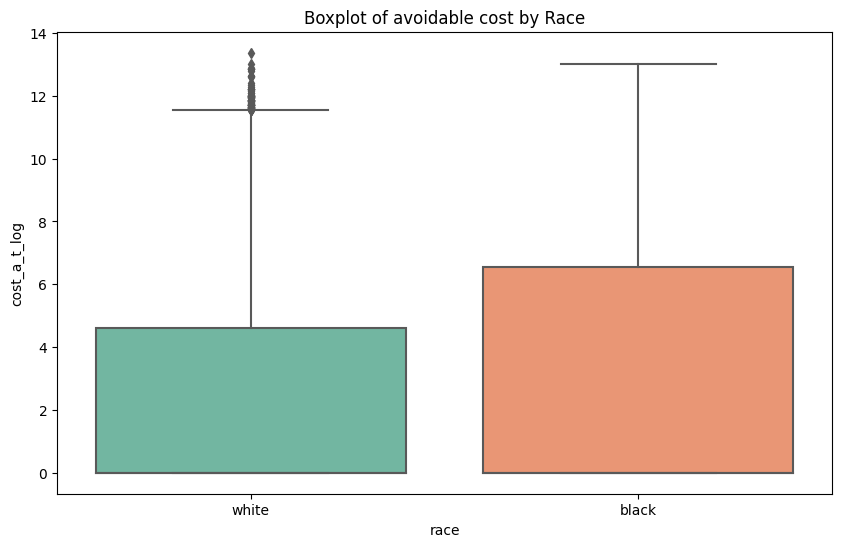

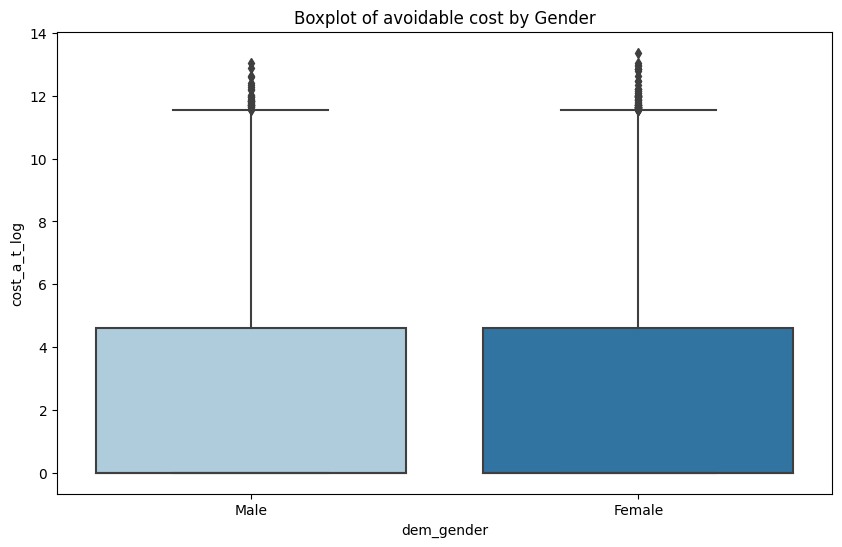

In [245]:
# Create side-by-side boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='ghba1c_mean_t', data=data_df, palette='Set2')
plt.title('Boxplot of GHBA1C by Race')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='dem_gender', y='ghba1c_mean_t', data=data_df, palette='Paired')
plt.title('Boxplot of GHBA1C by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='gagne_sum_t', data=data_df, palette='Set2')
plt.title('Boxplot of Total number of active chronic illnesses by Race')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='dem_gender', y='gagne_sum_t', data=data_df, palette='Paired')
plt.title('Boxplot of Total number of active chronic illnesses by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='ldl_mean_t', data=data_df, palette='Set2')
plt.title('Boxplot of mean low-density lipoprotein by Race')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='dem_gender', y='ldl_mean_t', data=data_df, palette='Paired')
plt.title('Boxplot of mean low-density lipoprotein by Gender')
plt.show()

# Log-transform the variables
data_df['cost_t_log'] = np.log1p(data_df['cost_t'])
data_df['cost_a_t_log'] = np.log1p(data_df['cost_avoidable_t'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='cost_t_log', data=data_df, palette='Set2')
plt.title('Boxplot of cost by Race')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='dem_gender', y='cost_t_log', data=data_df, palette='Paired')
plt.title('Boxplot of cost by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='cost_a_t_log', data=data_df, palette='Set2')
plt.title('Boxplot of avoidable cost by Race')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='dem_gender', y='cost_a_t_log', data=data_df, palette='Paired')
plt.title('Boxplot of avoidable cost by Gender')
plt.show()

### Trying to Predict the Risk Score



In [314]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report, accuracy_score, \
    average_precision_score, precision_score, recall_score, make_scorer, roc_curve, precision_recall_curve, \
    average_precision_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing, datasets
from sklearn.preprocessing import StandardScaler
import scipy.stats as stat
from sklearn.utils import resample
import random
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import RandomizedSearchCV
import itertools
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

In [315]:
def HPOptimize(clf, par, trainX, trainY, valX, valY, name, lossChoice):
    # Remember, this function returns a function -- yay for functional progrmaming, finally get to use the stuff I learned in that class lmao.
    customLoss, proba = choose_custom_loss(lossChoice)

    cv = RandomizedSearchCV(clf, par, cv=9, verbose=4,
                            scoring=make_scorer(customLoss, greater_is_better=True, needs_proba=proba), refit=True,
                            n_jobs=-1, n_iter=1)
    print(cv)
    # cv = GridSearchCV(clf, par, cv=5,  verbose=4, scoring=make_scorer(customLoss, greater_is_better=True, needs_proba=proba), refit=True, n_jobs=-1)
    search = cv.fit(trainX, trainY)
    topModel = search.best_estimator_
    topParams = search.best_params_

    paramDict = search.cv_results_

    calibrated_clf = CalibratedClassifierCV(base_estimator=topModel, cv=9, method='isotonic')
    cal_model = calibrated_clf.fit(trainX, trainY)

    # Test Set Performance: AUROC, precision, recall
    performance = performanceMetrics(valX, valY, cal_model)
    customScore = performance[0]

    y_score = cal_model.predict_proba(valX)
    precisionArr, recallArr, _ = precision_recall_curve(valY, y_score[:, 1])

    fprArr, tprArr, _ = roc_curve(valY, y_score[:, 1])

    return cal_model, topParams, customScore, performance, precisionArr, recallArr, fprArr, tprArr, name, paramDict